In [1]:
import pandas as pd
from IPython.core.pylabtools import figsize

dataIn = './../dataIn/'
dataOut = './../dataOut'

In [4]:
filename = dataIn + 'payment07.csv'
payment = pd.read_csv(filename, encoding='CP949')
payment

,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,윤장혁,서울,7,영업부,남자,4000,2000
1,서문덕,서울,6,영업부,남자,3000,3000
2,이성진,부산,5,영업부,남자,3000,3000
3,강찬혁,부산,3,영업부,남자,1000,2000
4,신유석,서울,5,전산부,여자,2000,2000
5,유지혜,서울,5,전산부,여자,4000,1000
6,이유리,부산,8,전산부,여자,4000,1000
7,선진희,부산,6,전산부,여자,1000,4000


In [5]:
payment['성별'].unique()

array(['남자', '여자'], dtype=object)

In [8]:
mygrouping = payment.groupby('성별')['교통비']
mygrouping.sum()

성별
남자    11000
여자    11000
Name: 교통비, dtype: int64

In [10]:
result = payment.groupby('성별')['출장기간'].agg('mean')
result

성별
남자    5.25
여자    6.00
Name: 출장기간, dtype: float64

In [12]:
agg_dict = {'출장기간':'sum','출장지역':'count'}
result = payment.groupby('성별').agg(agg_dict)
result

,출장기간,출장지역
성별,,
남자,21,4
여자,24,4


In [13]:
# 출장지역별 성별의 교통비의 총합 agg_dict = {'출장기간':'sum','출장지역':'count'}
result = payment.groupby(['출장지역','성별'])['교통비'].agg('sum')
result

출장지역  성별
부산    남자    4000
      여자    5000
서울    남자    7000
      여자    6000
Name: 교통비, dtype: int64

In [14]:
mydict = {'교통비':['sum','mean','max'],'출장기간':['mean','min']}
result = payment.groupby(['출장지역','성별']).agg(mydict)
result

교통비               출장기간    
          sum    mean   max mean min
출장지역 성별                             
부산   남자  4000  2000.0  3000  4.0   3
     여자  5000  2500.0  4000  7.0   6
서울   남자  7000  3500.0  4000  6.5   6
     여자  6000  3000.0  4000  5.0   5

In [15]:
filename =dataIn + 'welfareCleanNew.csv'
welfare = pd.read_csv(filename, encoding='UTF-8')
welfare.columns

Index(['성별', '생일', '결혼 유무', '종교 유무', '직업 코드', '소득', '지역구', '나이', '직업', '연령대',
       '점수', '신용'],
      dtype='object')

In [16]:
print('# 각 컬럼에 대한 데이터 분포 확인')
for col in welfare.columns:
    print(f'{col} 컬럼 정보')
    print(welfare[col].unique())
    print('-'*30)

# 각 컬럼에 대한 데이터 분포 확인
성별 컬럼 정보
['남성' '여성']
------------------------------
생일 컬럼 정보
[1948 1945 1946 1953 1960 1939 1947 1952 1949 1942 1944 1961 1956 1935
 1955 1957 1943 1940 1941 1954 1951 1973 1970 1962 1986 1958 1977 1937
 1938 1969 1950 1965 1982 1972 1988 1963 1966 1976 1985 1978 1975 1964
 1974 1981 1980 1983 1933 1968 1967 1979 1971 1990 1929 1992 1991 1995
 1994 1984 1993 1959 1928 1927 1934 1989 1987 1936 1996 1931 1998 1932
 1922 1923 1921 1919 1930 1925]
------------------------------
결혼 유무 컬럼 정보
['무응답' '이혼' '결혼']
------------------------------
종교 유무 컬럼 정보
['없슴' '있슴']
------------------------------
직업 코드 컬럼 정보
[ 942  762  530  999  312  254  510  286  521  773  314  941  951  274
  873  320  952  151  152  772  852  442  991  422  313  710  522  399
  753  851  235  231  311  721  953  930  863  910  392  761  922  285
  875  862  421  243  223  252  259  771  135  245  221  751  251  141
  722  246  289  281  741  261  247  441  864  222  411  799  743  780
  149  891  823  

In [17]:
# 결혼 유무별 소득의 평균 그래프

In [18]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')

In [19]:
welfare['결혼 유무'].unique()

array(['무응답', '이혼', '결혼'], dtype=object)

In [20]:
chartdata = welfare.groupby('결혼 유무')['소득'].mean()
chartdata

결혼 유무
결혼     259.935812
무응답    198.124863
이혼     196.780643
Name: 소득, dtype: float64

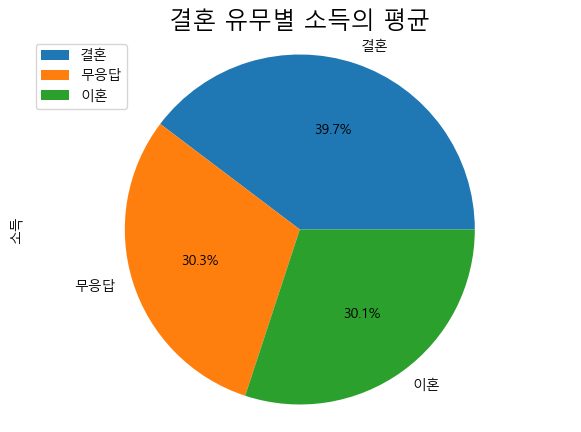

In [21]:
chartdata.plot(kind = 'pie', figsize = (7,5), autopct ='%1.1f%%')
plt.title('결혼 유무별 소득의 평균', size =17)
plt.axis('equal') # 도형 왜곡 방지를 위하여 가로 세로 비율 일대일로 그려주세요.
plt.legend(labels = chartdata.index, loc='upper left')

Text(0.5, 1.0, '산점도 : 소득 ds 나이')

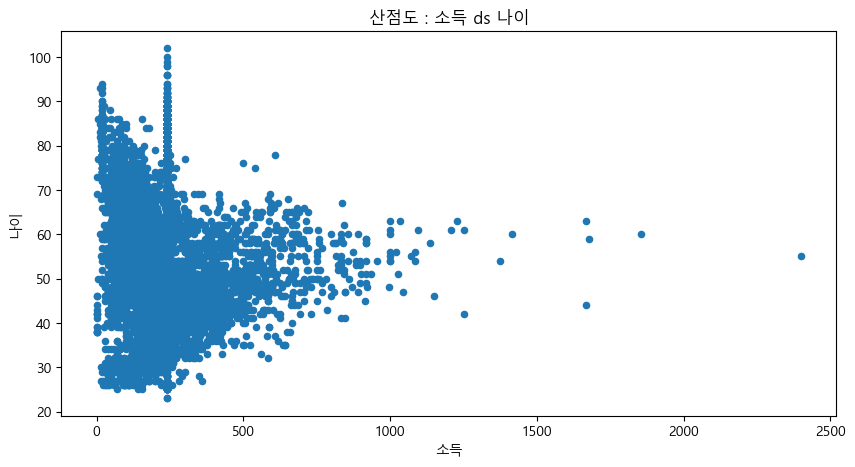

In [23]:
# 소득과 나이의 산점도
welfare.plot(kind ='scatter', figsize=(10,5), x='소득', y='나이')
plt.title('산점도 : 소득 ds 나이')

In [27]:
# 결혼 유무별 소득의 박스 플롯
marriage = [item for item in welfare['결혼 유무'].unique()]
marriage # 범주형 데이터

xData = [] # 범주형 데이터별 소득 정보를 담아 놓은 리스트
for mar in marriage:
    xData.append(welfare[welfare['결혼 유무']==mar]['소득'])
# end for

xData

[0       120.000000
 12      174.000000
 14      152.000000
 22       86.000000
 35      127.000000
            ...    
 7495    263.300000
 7513     14.000000
 7517    241.619016
 7523    241.619016
 7527    280.000000
 Name: 소득, Length: 1803, dtype: float64,
 1       220.200000
 7       170.000000
 26      250.000000
 46      200.000000
 99      200.000000
            ...    
 7341    253.000000
 7350     73.900000
 7432    241.619016
 7438    160.000000
 7481    241.619016
 Name: 소득, Length: 419, dtype: float64,
 2        139.000000
 3        150.000000
 4        166.000000
 5        241.619016
 6        150.000000
            ...     
 7522     241.619016
 7524     241.619016
 7525     250.000000
 7526    1250.000000
 7528     156.000000
 Name: 소득, Length: 5307, dtype: float64]

Text(0.5, 1.0, '결혼 유무별 소득(박스 플롯)')

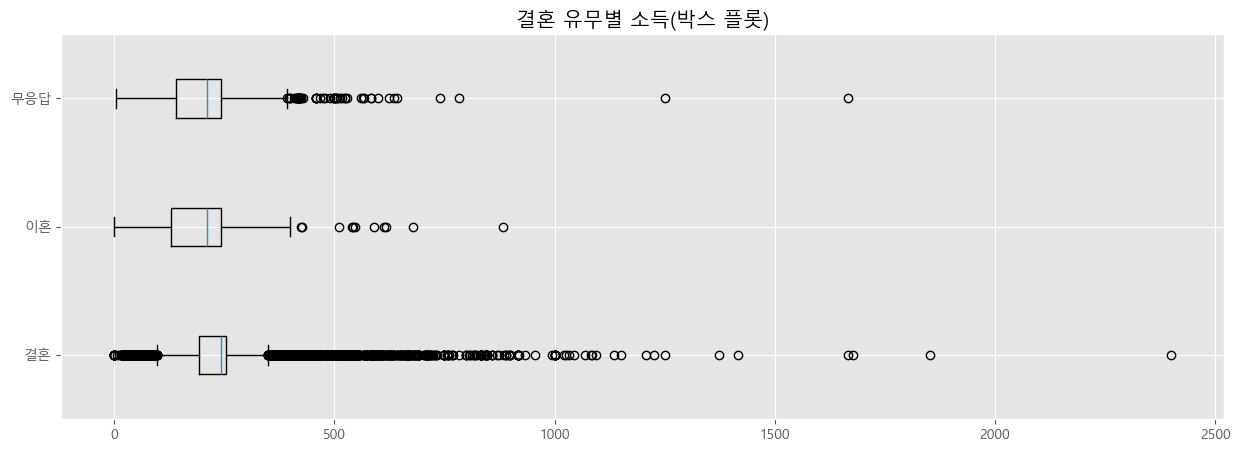

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 5))

plt.boxplot(
    x=[
        welfare[welfare['결혼 유무']=='결혼']['소득'],
        welfare[welfare['결혼 유무']=='이혼']['소득'],
        welfare[welfare['결혼 유무']=='무응답']['소득']
    ],
    tick_labels=['결혼', '이혼', '무응답'],
    vert=False
)

plt.title('결혼 유무별 소득(박스 플롯)')

In [31]:
concern = ['성별','지역구','나이','소득']
newWelfare = welfare[concern]
newWelfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7529 entries, 0 to 7528
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      7529 non-null   object 
 1   지역구     7529 non-null   object 
 2   나이      7529 non-null   int64  
 3   소득      7529 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 235.4+ KB


In [32]:
newWelfare.head() # head() 함수는 앞 5행만 보여줍니다. <-> tail()

,성별,지역구,나이,소득
0,남성,서울,73,120.0
1,남성,서울,76,220.2
2,남성,서울,75,139.0
3,남성,서울,68,150.0
4,남성,서울,61,166.0


In [33]:
print('# 소득 컬럼 누락 데이터 확인')
if newWelfare['소득'].hasnans:
    print('누락 데이터 있음')
else:
    print('누락된 데이터 없음')

# 소득 컬럼 누락 데이터 확인
누락된 데이터 없음


In [34]:
print(f'# 소득 컬럼의 형상 : {newWelfare.shape}')

# 소득 컬럼의 형상 : (7529, 4)


In [35]:
print(f'# 소득 컬럼의 기초 통계량 확인')
# 메소드 체이닝 : 메소드 작정시 dot(.)을 연속으로 작성ㅇ하는 기법
newWelfare['소득'].describe().to_frame().T

# 소득 컬럼의 기초 통계량 확인


,count,mean,std,min,25%,50%,75%,max
소득,7529.0,241.619016,144.679991,0.0,162.6,241.619016,241.619016,2400.0


In [37]:
print('# 소득 오름차순으로 정렬해보기')
newWelfare['소득'].sort_values().head(10).to_frame().T

# 소득 오름차순으로 정렬해보기


,4426,4428,4484,4454,4393,4479,4417,1400,3353,4636
소득,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
print('# 소득 내림차순으로 정렬해보기')
newWelfare['소득'].sort_values(ascending=False).head(10).to_frame().T

# 소득 내림차순으로 정렬해보기


,881,7136,7250,5484,2409,4740,5488,5485,7526,4747
소득,2400.0,1853.3,1678.7,1666.7,1666.66,1416.7,1374.0,1250.0,1250.0,1226.7


In [39]:
# 소득이 1200보다 큰 데이터들은 이상치(outlier)라고 가정하고 삭제합니다.
print(f'# 제거전 갯수 : {len(newWelfare)}')
newWelfare = newWelfare.loc[newWelfare['소득'] <= 1200]
print(f'# 제거후 갯수 : {len(newWelfare)}')
print(f'# 소득 최대값 : {newWelfare["소득"].max}')
print(f'# 소득 최소값 : {newWelfare["소득"].min}')

# 제거전 갯수 : 7529
# 제거후 갯수 : 7518
# 소득 최대값 : <bound method Series.max of 0       120.000000
1       220.200000
2       139.000000
3       150.000000
4       166.000000
           ...    
7523    241.619016
7524    241.619016
7525    250.000000
7527    280.000000
7528    156.000000
Name: 소득, Length: 7518, dtype: float64>
# 소득 최소값 : <bound method Series.min of 0       120.000000
1       220.200000
2       139.000000
3       150.000000
4       166.000000
           ...    
7523    241.619016
7524    241.619016
7525    250.000000
7527    280.000000
7528    156.000000
Name: 소득, Length: 7518, dtype: float64>


Text(0.5, 0, '소득')

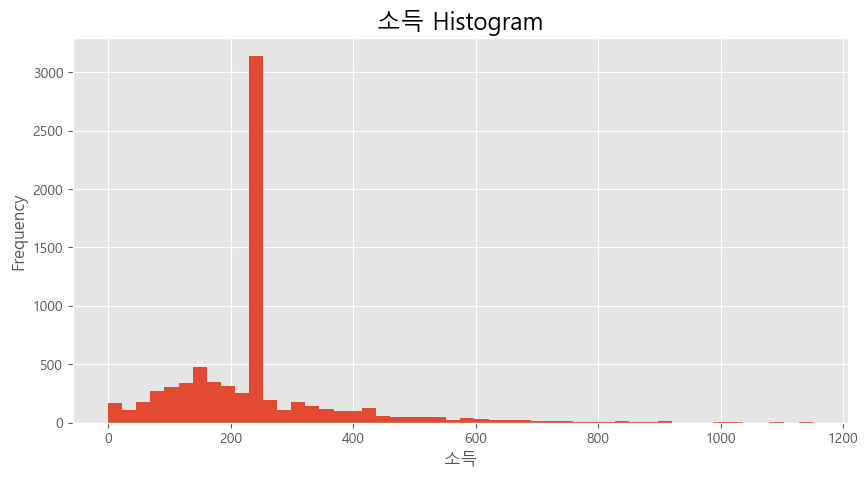

In [41]:
# 히스토그램 그리기
hist_chart = newWelfare["소득"]
hist_chart.plot(kind = 'hist', figsize=(10,5), bins=50) # bins는 계급의 갯수
plt.title('소득 Histogram', size=17)
plt.xlabel('소득')

In [42]:
import numpy as np
# np.inf : 무한대
mybins = [-np.inf, 200, 500, 700, 1000, np.inf] # 나눌 구간 지정
cut_line = pd.cut(newWelfare["소득"], bins= mybins)
cut_line.head().to_frame().T

,0,1,2,3,4
소득,"(-inf, 200.0]","(200.0, 500.0]","(-inf, 200.0]","(-inf, 200.0]","(-inf, 200.0]"


In [44]:
print('소득 구간별 빈도수 확인')
cut_line.value_counts().to_frame()
# 확인 결과 : 소득 분포가 (200~500) 사이에 가장 많음

소득 구간별 빈도수 확인


,count
소득,
"(200.0, 500.0]",4657
"(-inf, 200.0]",2473
"(500.0, 700.0]",280
"(700.0, 1000.0]",98
"(1000.0, inf]",10


In [53]:
print('# 이산화된 소득별로 성별 비율 확인')
# observed= False이면 실제로 존재하지 않는 범주 데이터도 같이 보여줍니다.
result = 100.0 * newWelfare.groupby(cut_line, observed= False)['성별'].value_counts(normalize=True)
result

# 이산화된 소득별로 성별 비율 확인


소득               성별
(-inf, 200.0]    여성     68.621108
                 남성     31.378892
(200.0, 500.0]   남성     62.465106
                 여성     37.534894
(500.0, 700.0]   남성     83.571429
                 여성     16.428571
(700.0, 1000.0]  남성     89.795918
                 여성     10.204082
(1000.0, inf]    남성    100.000000
                 여성      0.000000
Name: proportion, dtype: float64

In [60]:
print('# 이산화 값을 한글로 변경후 파생 컬럼으로 추가하기')
hangul_labal = ['저소득','중저소득','중소득','중고소득','고소득']
cuts_label = pd.cut(newWelfare['소득'], bins=mybins, labels=hangul_labal)
cuts_label.head()

print('# 파생 컬럼으로 추가하기')
newWelfare.loc[:,'범주형소득'] = cuts_label
newWelfare.head()

# 이산화 값을 한글로 변경후 파생 컬럼으로 추가하기
# 파생 컬럼으로 추가하기


,성별,지역구,나이,소득,범주형소득
0,남성,서울,73,120.0,저소득
1,남성,서울,76,220.2,중저소득
2,남성,서울,75,139.0,저소득
3,남성,서울,68,150.0,저소득
4,남성,서울,61,166.0,저소득


In [66]:
print('# 성별, 범주형 소득별로 소득의 평균')
chartdata = newWelfare.groupby(['성별','범주형소득'], observed=False)['소득'].mean().to_frame()
chartdata = chartdata.reset_index()
chartdata

# 성별, 범주형 소득별로 소득의 평균


,성별,범주형소득,소득
0,남성,저소득,132.813144
1,남성,중저소득,277.966875
2,남성,중소득,586.030470
3,남성,중고소득,820.022273
4,남성,고소득,1074.030000
5,여성,저소득,114.459034
6,여성,중저소득,252.843971
7,여성,중소득,563.363261
8,여성,중고소득,833.383000
9,여성,고소득,NaN


In [67]:
# 성별 컬럼은 행에, 범주형소득 컬럼은 열에, 값을 소득정보를 배치하세요
chartdata = chartdata.pivot(index = '성별', columns= '범주형소득', values='소득')
chartdata

범주형소득,저소득,중저소득,중소득,중고소득,고소득
성별,,,,,
남성,132.813144,277.966875,586.030470,820.022273,1074.03
여성,114.459034,252.843971,563.363261,833.383000,NaN


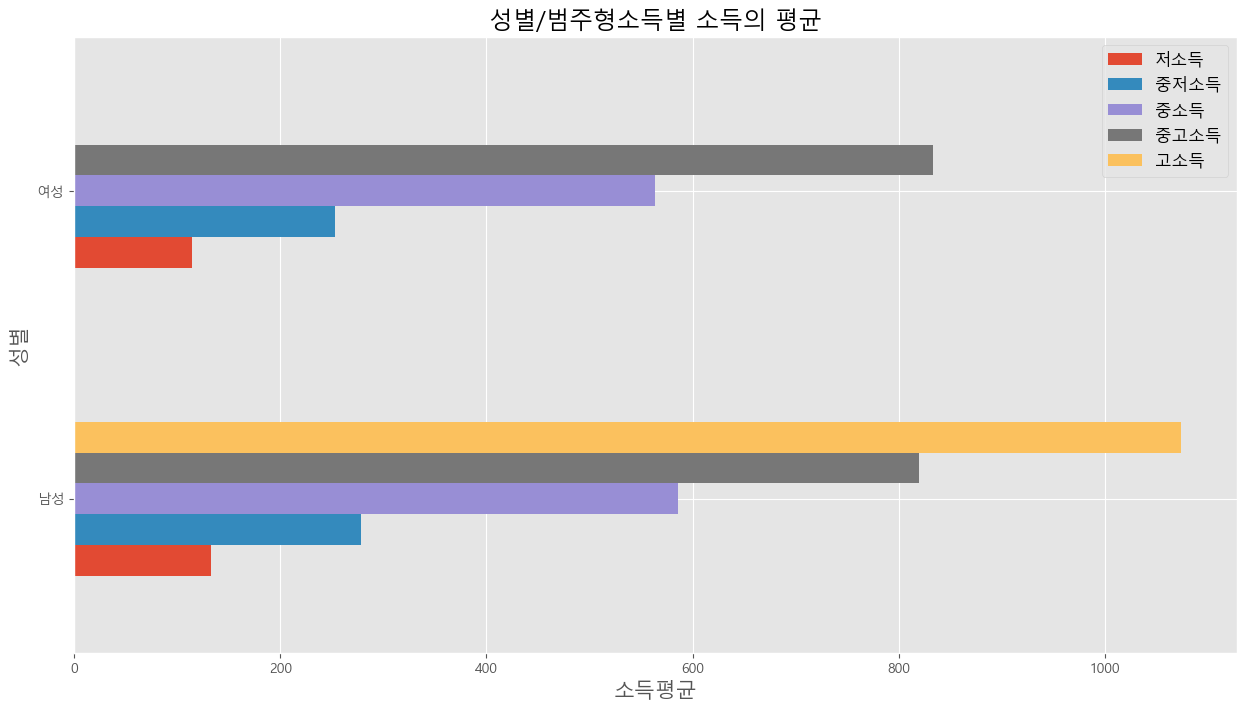

In [69]:
chartdata.plot(kind='barh', figsize=(15, 8))
plt.title('성별/범주형소득별 소득의 평균', size=17)
plt.xlabel('소득평균', size=15)
plt.ylabel('성별', size=15)
plt.legend(loc='best', fontsize=12) # loc='best'는 배치하기 좋은데 두라는 의미입니다.